In [21]:
import pandas as pd
import matplotlib.pyplot as plt

Preprocessing Data

In [13]:
df = pd.read_csv("Dataset.csv")
pd.options.display.max_columns = 100
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [14]:
# Binary Encoding- Attrition, Gender, MaritalStatus, Over18, OverTime

df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["MaritalStatus"] = df["MaritalStatus"].apply(lambda x: 1 if x == "Married" else 0)
df["Over18"] = df["Over18"].apply(lambda x: 1 if x == "Y" else 0)
df["OverTime"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0


In [15]:
# One Hot Encoding - BusinessTravel, Department, EducationField, JobRole 

df = df.join(pd.get_dummies(df["BusinessTravel"], prefix="BusinessTravel")).drop("BusinessTravel", axis=1)
df = df.join(pd.get_dummies(df["Department"], prefix="Department")).drop("Department", axis=1)
df = df.join(pd.get_dummies(df["EducationField"], prefix="EducationField")).drop("EducationField", axis=1)
df = df.join(pd.get_dummies(df["JobRole"], prefix="JobRole")).drop("JobRole", axis=1)

df.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,49,0,279,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
5,32,0,1005,2,2,1,8,4,1,79,3,1,4,0,3068,11864,0,1,0,13,3,3,80,0,8,2,2,7,7,3,6,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
6,59,0,1324,3,3,1,10,3,0,81,4,1,1,1,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
7,30,0,1358,24,1,1,11,4,1,67,3,1,3,0,2693,13335,1,1,0,22,4,2,80,1,1,2,3,1,0,0,0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
8,38,0,216,23,3,1,12,4,1,44,2,3,3,0,9526,8787,0,1,0,21,4,2,80,0,10,2,3,9,7,1,8,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
9,36,0,1299,27,3,1,13,3,1,94,3,2,3,1,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [19]:
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
df.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [20]:
df = df.drop('EmployeeNumber', axis=1)

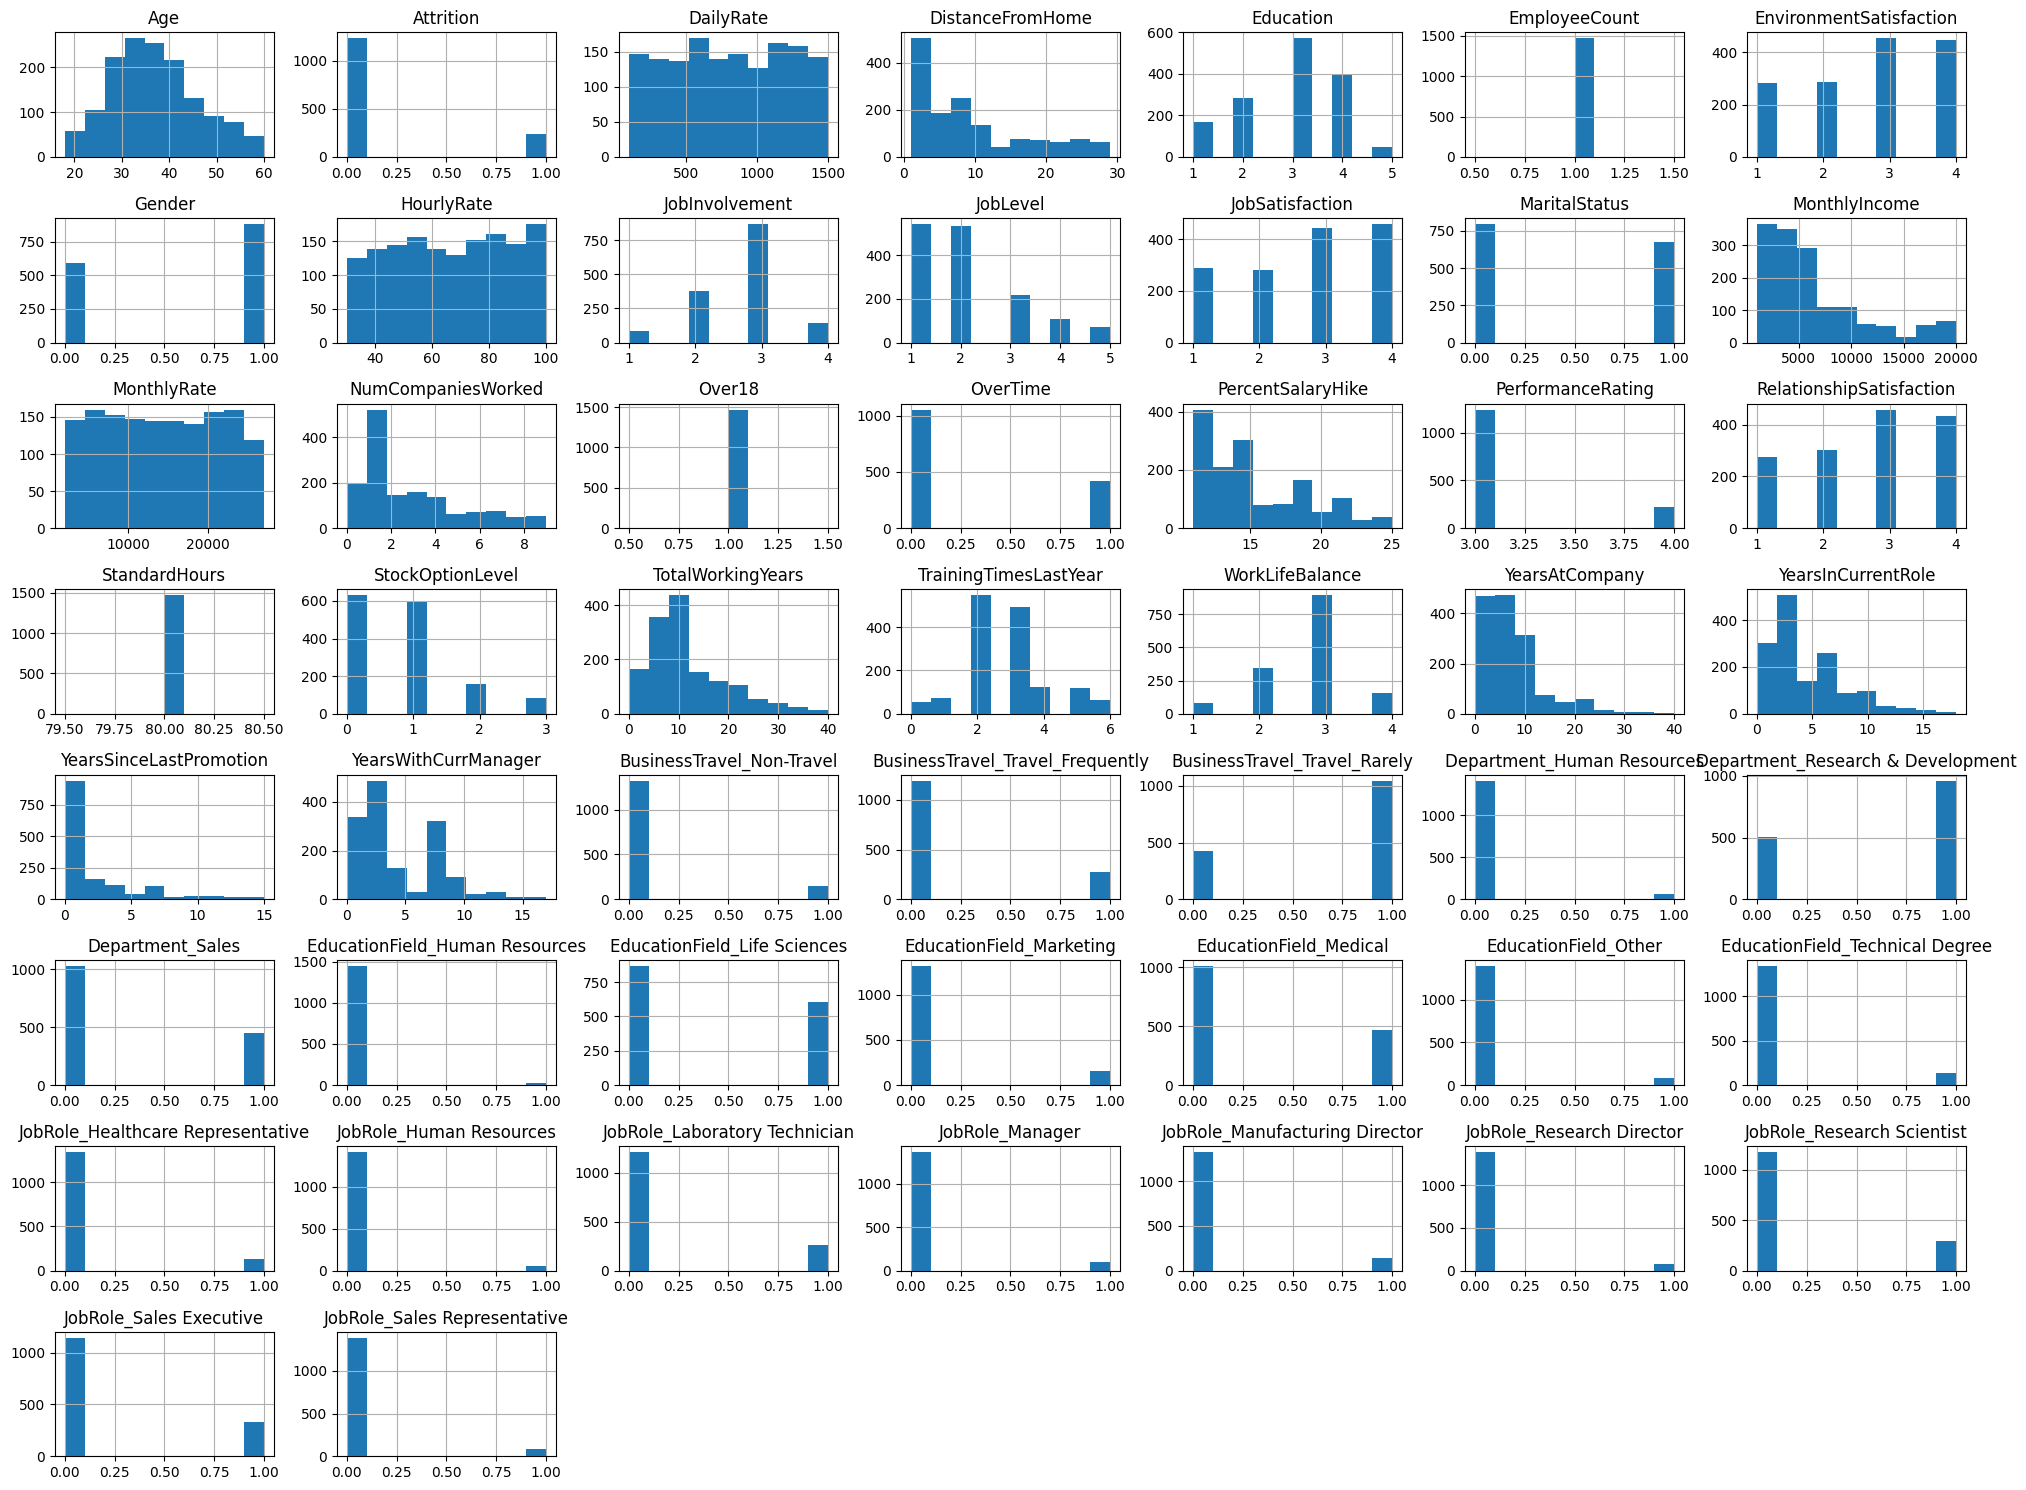

In [22]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

By looking at the histogram, the irrelevant features are :- EmployeeCount, Over18, StandardHours

In [24]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,2,0,94,3,2,4,0,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,3,1,61,2,2,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,1,92,2,1,3,0,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,4,0,56,3,1,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,1,40,3,1,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1466,39,0,613,6,1,4,1,42,2,3,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1467,27,0,155,4,3,2,1,87,4,2,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1468,49,0,1023,2,3,4,1,63,2,2,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


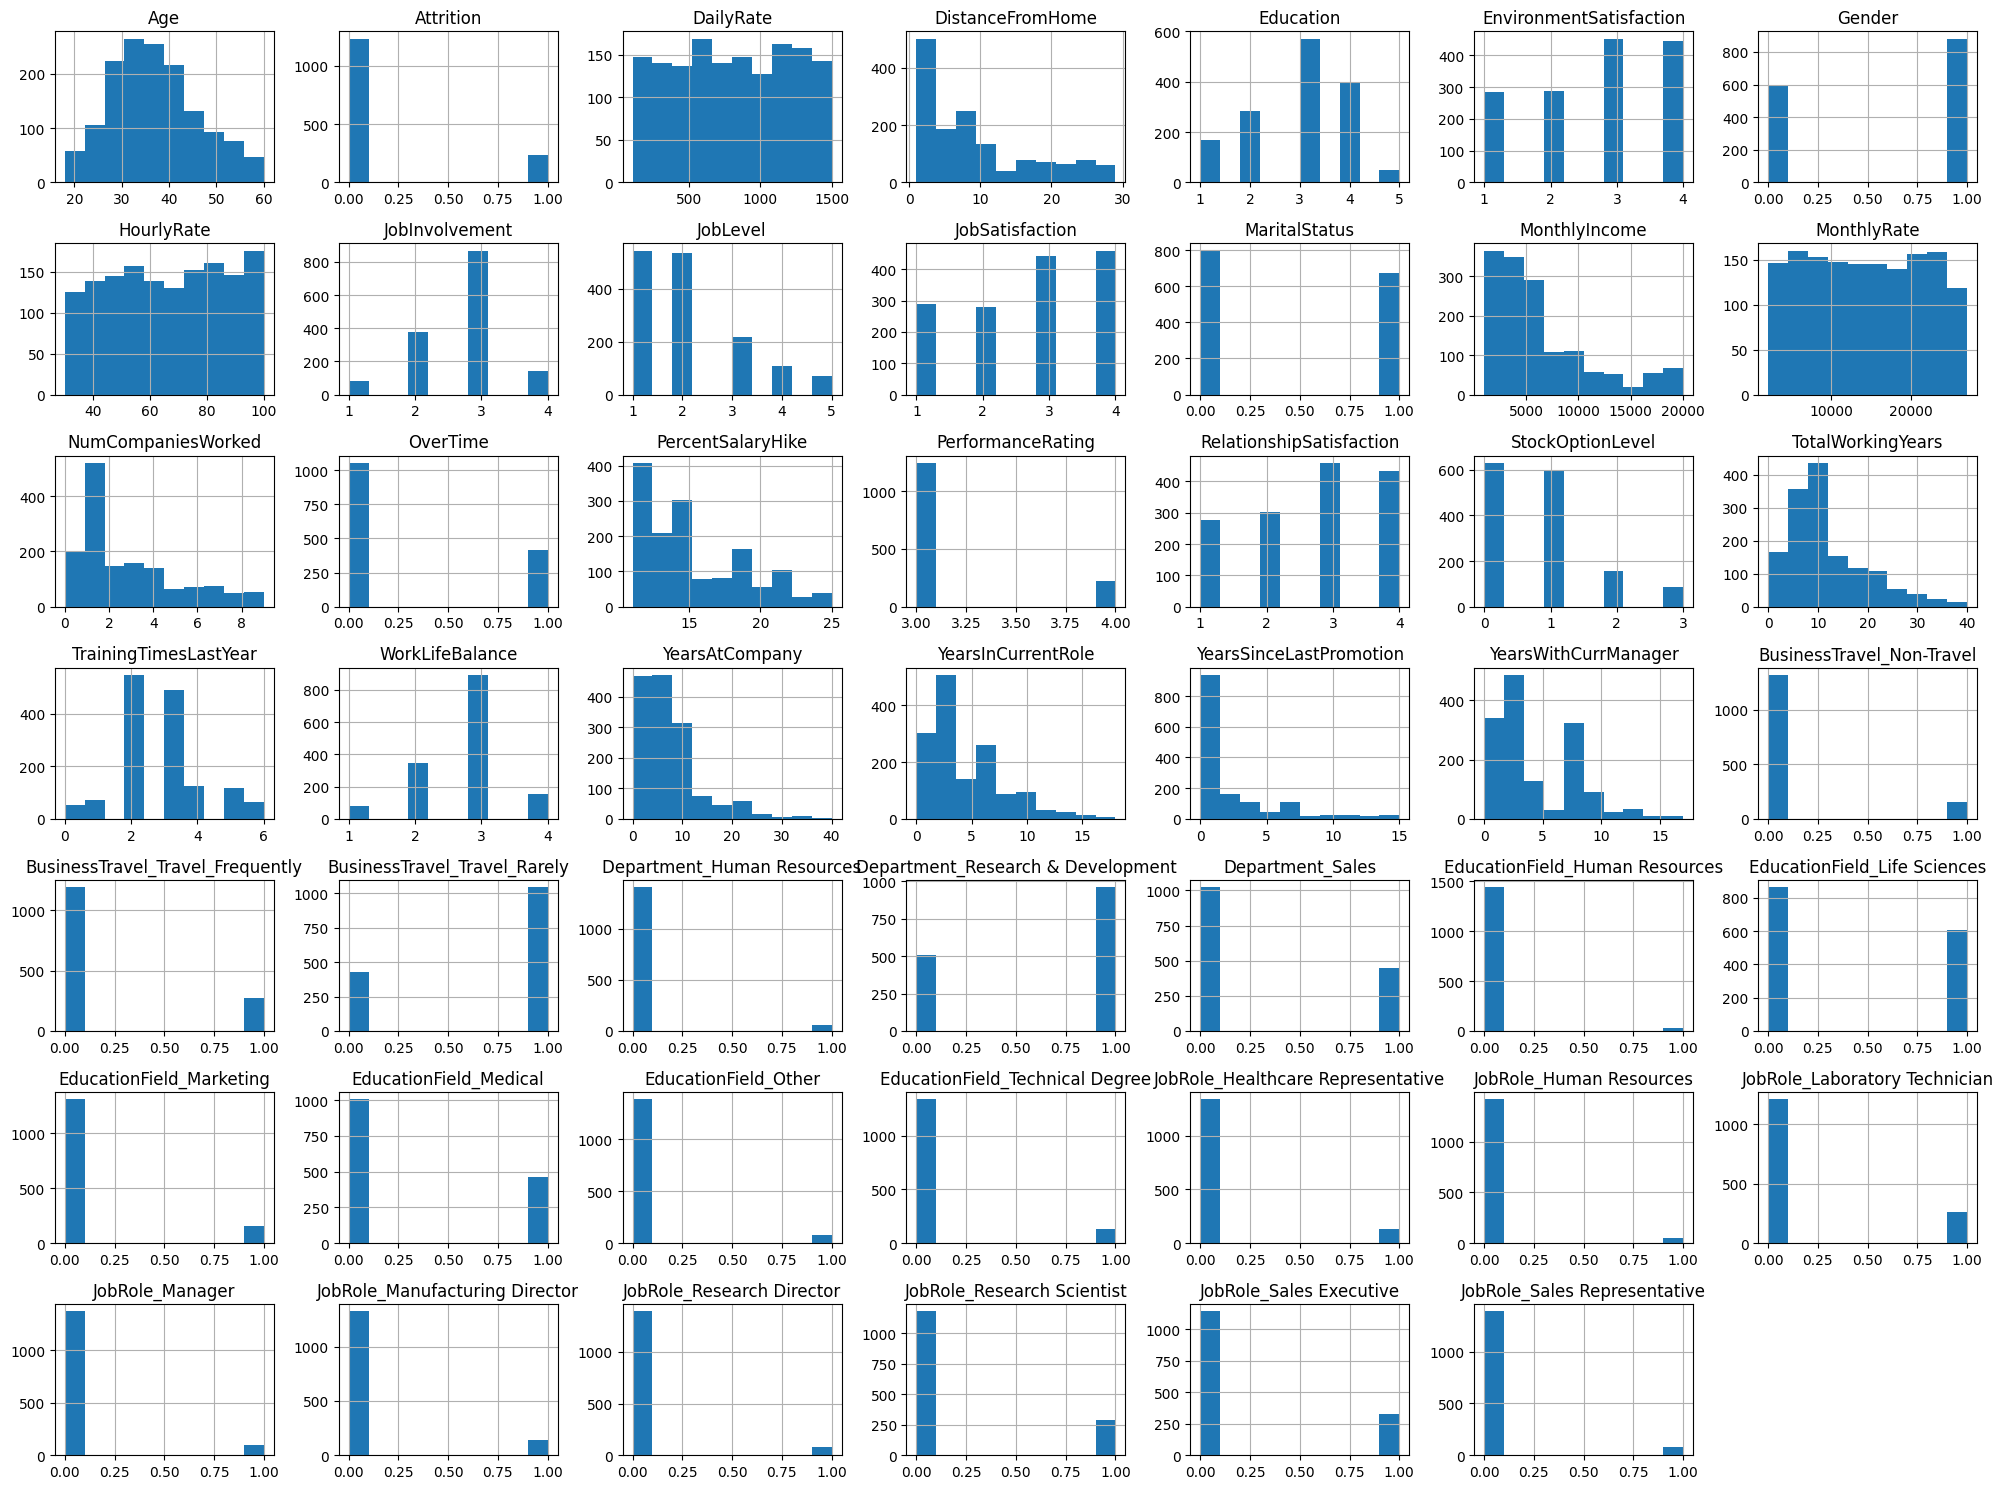

In [25]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

Model Training

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split    

In [27]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\

model = RandomForestClassifier(n_jobs=-1)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [28]:
model.score(X_test, y_test)

0.8775510204081632

Feature Importances

In [31]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))

# Plotting feature importances- Describes which features are most important in predicting attrition

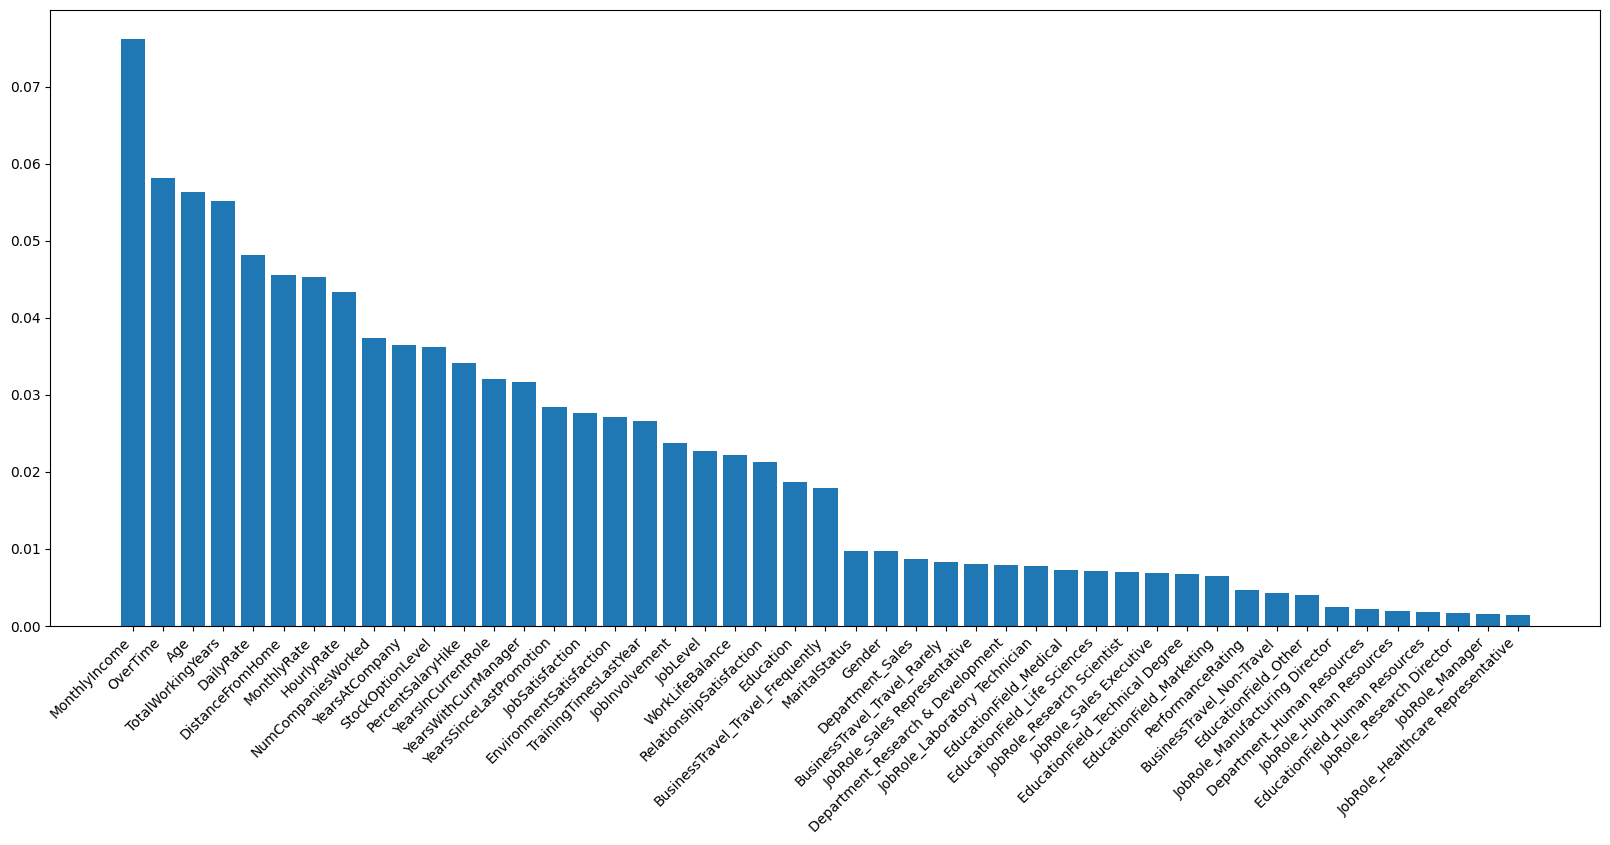

In [32]:
plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha='right')

plt.show()